Source: https://www.cs.cornell.edu/courses/cs1114/2013sp/sections/S06_convolution.pdf

# The convolution operation

In this section I will discuss the convolution operation which is used in the Convolutional Neural Networks. 
Convolution operates on two signals for 1D, or two images for 2D. The first signal or image is the *input*, and the other (called *kernel*) serves as a "filter" over the input image, producing an output image. The convolution then takes two images or signals and then outputs a third one. 

In 1D The convolution operation of two functions, f and g, is defined as:
$$
h(t) = (f * g)(x) = \int_{-\infty}^{\infty} f(\tau) \, g(x - \tau) \, d\tau
$$

where: 

$f$: first signal or image: The image that I want to process

$g$: the filter or kernel

$h$: the signal or image convoluted

$x$: This is the independent variable representing the time or space point at which we are evaluating the convolution. It is the output variable of the convolution operation.

$\tau$: This is a dummy variable used for integration. It represents the time or space shift within the convolution operation. As we integrate over τ, we are essentially sliding the function g(t - τ) across the function f(τ). 

Discretizing the Eq. (1) using discrete vectorial functions $h[x]$, $g[x]$, $f[x]$

$$
h[x] = (f * g)[x] = \sum_{\tau=-\infty}^{\infty} f[\tau] \cdot g[x - \tau]
$$

Using a discrete domain and vector arrays the convolution can be done over datasets.
In example: 

An input function $f[x]$ can be defined as a column vector like this:

$$
f[x] = \begin{bmatrix} f[x_0] \\ f[x_1] \\ f[x_2] \\ f[x_3] \\ f[x_4] \\ \end{bmatrix}
$$

A filter function or array can ve defined as a column vector (with $\tau = 0$):

$$
g[x-0] = \begin{bmatrix} 3 \\ 2 \\ 1 \\ 0 \\ 0 \\ \end{bmatrix}
$$

Now with $\tau > 0$ $g[x-\tau]$ has a special meaning: the slicing of the filter from top to bottom adding zeroes at the top of the colum vector.
 
$$
g[x-1] = \begin{bmatrix} 0 \\ 3 \\ 2 \\ 1 \\ 0 \\ \end{bmatrix}
$$

With this definitions, let say, in example, the third element of the $h[x]$ summation ($\tau = 2$) could be:

$$h_{3}[x] = f[2]g[x-2] =  f[x_2] \cdot \begin{bmatrix} 0 \\ 0 \\ 3 \\ 2 \\ 1 \\ \end{bmatrix} $$

With this filter the hole summation $h(x)$ is: 

$$ h[x] = f[0]g[x-0] + f[1]g[x-1] + f[2]g[x-2] + f[3]g[x-3] + f[4]g[x-4]$$

$$ h[x] = f[x_0] \cdot \begin{bmatrix} 3 \\ 2 \\ 1 \\ 0 \\ 0 \\ \end{bmatrix} + f[x_1] \cdot \begin{bmatrix} 0 \\ 3 \\ 2 \\ 1 \\ 0 \\ \end{bmatrix} + f[x_2] \cdot \begin{bmatrix} 0 \\ 0 \\ 3 \\ 2 \\ 1 \\ \end{bmatrix} + f[x_3] \cdot \begin{bmatrix} 0 \\ 0 \\ 0 \\ 3 \\ 2 \\ \end{bmatrix} + f[x_4] \cdot \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 3 \\ \end{bmatrix} $$

$$
h[x] = \begin{bmatrix}
3 & 0 & 0 & 0 & 0 \\
2 & 3 & 0 & 0 & 0 \\
1 & 2 & 3 & 0 & 0 \\
0 & 1 & 2 & 3 & 0 \\
0 & 0 & 1 & 2 & 3 \\
\end{bmatrix}
\cdot \begin{bmatrix} f[x_0] \\ f[x_1] \\ f[x_2] \\ f[x_3] \\ f[x_4] \\ \end{bmatrix} 
$$

Example 1

Make the convolution of $f$$ x \in \mathbb{Z} \mid 0 \leq x < 5$

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [6]:
x = np.arange(0,5)
f_x = x**2
print(f_x)

[ 0  1  4  9 16]


In [7]:
gx = np.array([3,2,1,0,0])
print(g_x)

[3 2 1 0 0]


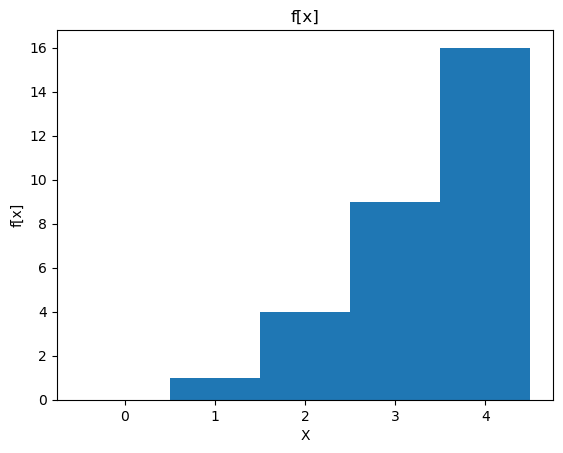

In [14]:
# Plot histogram with each value as its own bin and height
plt.bar(range(len(f_x)), f_x, tick_label=x, width=1.0)

# Add labels and title
plt.xlabel('X')
plt.ylabel('f[x]')
plt.title('f[x]')

# Show the plot
plt.show()

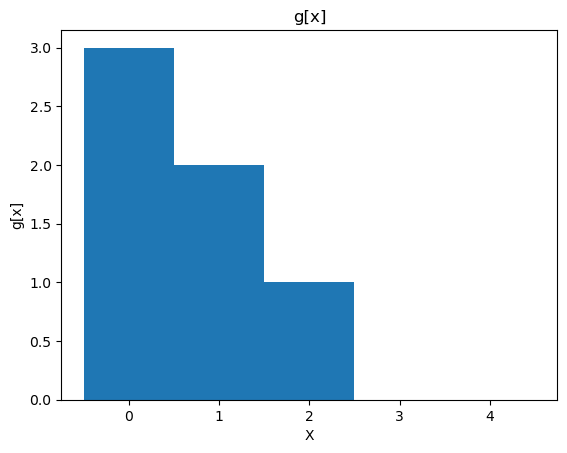

In [15]:
# Plot histogram with each value as its own bin and height
plt.bar(range(len(g_x)), g_x, tick_label=x, width=1.0)

# Add labels and title
plt.xlabel('X')
plt.ylabel('g[x]')
plt.title('g[x]')

# Show the plot
plt.show()

In [43]:
a = np.array([5, 3, 7, 1, 2])
b = np.array([0,0,3, 2, 1])
cn = np.convolve(a,b, mode='same')
print(cn)

[15 19 32 20 15]


In [44]:
sig = a
fil = b
filtered = signal.convolve(sig, fil, mode='same', method="fft")
print(filtered)

[15 19 32 20 15]
